## Exploração de dados

Essa linha importa a biblioteca pandas, usada para análise e manipulação de dados em Python.

In [7]:
import pandas as pd
from IPython.display import Image, display


Essa linha usa o **pandas** para carregar o arquivo CSV em um DataFrame chamado `microdados`, definindo o separador `|` e a codificação `utf-8` para ler corretamente os dados.


In [3]:
microdados=pd.read_csv("./dados/relatorio_chamada_regular_SISU_2010_1.csv", sep="|", encoding="utf-8")

Esse comando retorna os nomes das colunas do DataFrame `microdados`.


In [4]:
microdados.columns.values

array(['nu_ano', 'nu_edicao', 'ds_etapa', 'cod_ies', 'ies', 'sigla_ies',
       'uf_ies', 'cod_campus', 'campus', 'uf_campus', 'municipio_campus',
       'codigo_curso', 'nome_curso', 'grau', 'turno', 'tp_modalidade',
       'ds_modalidade', 'qt_bonus_perc', 'nu_peso_l', 'nu_peso_ch',
       'nu_peso_cn', 'nu_peso_m', 'nu_peso_r', 'nota_minima_l',
       'nota_minima_ch', 'nota_minima_cn', 'nota_minima_m',
       'nota_minima_r', 'media_minima', 'cpf', 'co_inscricao_enem',
       'no_inscrito', 'tp_sexo', 'dt_nascimento', 'uf_origem',
       'municipio_candidato', 'st_opcao', 'nu_nota_l', 'nu_nota_ch',
       'nu_nota_cn', 'nu_nota_m', 'nu_nota_r', 'nota_l_com_peso',
       'nota_ch_com_peso', 'nota_cn_com_peso', 'nota_m_com_peso',
       'nota_r_com_peso', 'nota_concorrencia', 'nu_notacorte',
       'nu_classificacao', 'st_aprovado', 'st_matricula', 'ds_matricula'],
      dtype=object)

Aqui é criada a lista `colunasSelecionadas` com os nomes de interesse e, em seguida, o `read_csv` do **pandas** lê o arquivo importando apenas essas colunas, que são salvas no DataFrame `microdados`.


In [5]:
colunasSelecionadas=['nu_ano', 'co_inscricao_enem','ds_etapa','cod_ies', 'ies','uf_ies', 'campus','uf_campus', 'municipio_campus', 'nome_curso','grau','turno','tp_modalidade',
                      'tp_sexo', 'uf_origem','municipio_candidato','st_opcao','nota_concorrencia','nu_notacorte',
                      'st_aprovado','st_matricula', 'nu_peso_l', 'nu_peso_ch',
                    'nu_peso_cn', 'nu_peso_m', 'nu_peso_r', 'nota_minima_l',
                    'nota_minima_ch', 'nota_minima_cn', 'nota_minima_m', 'dt_nascimento',
                    'nota_minima_r', 'media_minima']
microdados= pd.read_csv("./dados/relatorio_chamada_regular_SISU_2010_1.csv", sep="|", encoding="ISO-8859-1" ,  usecols= colunasSelecionadas)

O comando `microdados.head()` mostra as primeiras 5 linhas do DataFrame, facilitando a visualização inicial dos dados.


In [5]:

microdados.head()

,nu_ano,ds_etapa,cod_ies,ies,uf_ies,campus,uf_campus,municipio_campus,nome_curso,grau,...,co_inscricao_enem,tp_sexo,dt_nascimento,uf_origem,municipio_candidato,st_opcao,nota_concorrencia,nu_notacorte,st_aprovado,st_matricula
0,2010,1Âª CHAMADA,587,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO,PE,"Recife-PE, Rua Dom Manoel de Medeiros, Dois Ir...",PE,Recife,Zootecnia,Bacharelado,...,200XXXXXX001,M,1991,PE,PAULISTA,1,"607,18","671,75",N,N
1,2010,2Âª CHAMADA,587,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO,PE,"Recife-PE, Rua Dom Manoel de Medeiros, Dois Ir...",PE,Recife,CiÃªncias BiolÃ³gicas,Licenciatura,...,200XXXXXX001,M,1991,PE,PAULISTA,1,"607,18","669,95",N,N
2,2010,3Âª CHAMADA,587,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO,PE,"Recife-PE, Rua Dom Manoel de Medeiros, Dois Ir...",PE,Recife,CiÃªncias BiolÃ³gicas,Bacharelado,...,200XXXXXX001,M,1991,PE,PAULISTA,1,"613,42","669,16",N,N
3,2010,1Âª CHAMADA,1303,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",GO,"Morrinhos-GO, BR 153 KM 633, ZONA RURAL",GO,Morrinhos,Sistemas para Internet,TecnolÃ³gico,...,200XXXXXX004,M,1988,GO,GOIATUBA,1,"680,70","659,92",S,S
4,2010,1Âª CHAMADA,5322,FUNDAÃÃO UNIVERSIDADE FEDERAL DO PAMPA - UNI...,RS,"Dom Pedrito-RS, Rua Borges de Medeiros, Centro",RS,Dom Pedrito,Zootecnia,Bacharelado,...,200XXXXXX006,M,1990,TO,TAGUATINGA,1,"602,46","620,62",N,N


## Visualizando Candidatos por Sexo  


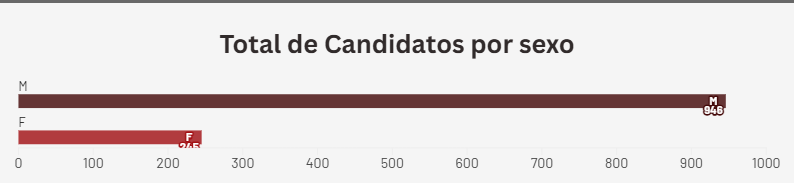

In [10]:
display(Image("imagens/candidatos por sexo.png", width=800, height=600))


## Selecionando cursos da área de Tecnologia da Informação (TI)

Nesta etapa, filtramos a base de dados para manter apenas os cursos relacionados à área de Tecnologia da Informação (TI).  
O critério de seleção foi definido a partir de palavras-chave comuns em nomes de cursos da área, tais como:

- **Informática**
- **Computação**
- **Software**
- **Sistemas**
- **Tecnologia da Informação**
- **Engenharia de Computação**
- **Ciência da Computação**


O filtro foi implementado com expressões regulares, garantindo a captura de diferentes variações de nomenclatura presentes no campo `nome_curso`.

In [3]:

padrao_ti = "Informática|Computação|Software|Sistemas|Tecnologia da Informação|Engenharia da Computação|Ciência da Computação"

microdados = microdados[
    microdados["nome_curso"].str.contains(
        padrao_ti,
        case=False,
        na=False
    )
]


microdados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 113645 entries, 3 to 1670511
Data columns (total 53 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   nu_ano               113645 non-null  int64  
 1   nu_edicao            113645 non-null  int64  
 2   ds_etapa             113645 non-null  object 
 3   cod_ies              113645 non-null  int64  
 4   ies                  113645 non-null  object 
 5   sigla_ies            110697 non-null  object 
 6   uf_ies               113645 non-null  object 
 7   cod_campus           113645 non-null  int64  
 8   campus               113645 non-null  object 
 9   uf_campus            113645 non-null  object 
 10  municipio_campus     113645 non-null  object 
 11  codigo_curso         113645 non-null  int64  
 12  nome_curso           113645 non-null  object 
 13  grau                 113645 non-null  object 
 14  turno                113645 non-null  object 
 15  tp_modalidade        

In [13]:
microdados.head()

,nu_ano,ds_etapa,cod_ies,ies,uf_ies,campus,uf_campus,municipio_campus,nome_curso,grau,...,co_inscricao_enem,tp_sexo,dt_nascimento,uf_origem,municipio_candidato,st_opcao,nota_concorrencia,nu_notacorte,st_aprovado,st_matricula
3,2010,1Âª CHAMADA,1303,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",GO,"Morrinhos-GO, BR 153 KM 633, ZONA RURAL",GO,Morrinhos,Sistemas para Internet,TecnolÃ³gico,...,200XXXXXX004,M,1988,GO,GOIATUBA,1,"680,70","659,92",S,S
81,2010,1Âª CHAMADA,599,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",BA,"Salvador-BA, Rua EmÃ­dio dos Santos, Barbalho",BA,Salvador,AnÃ¡lise e Desenvolvimento de Sistemas,TecnolÃ³gico,...,200XXXXXX092,F,1989,BA,SALVADOR,1,"397,12","702,54",N,N
114,2010,1Âª CHAMADA,588,UNIVERSIDADE TECNOLÃGICA FEDERAL DO PARANÃ,PR,"Ponta Grossa-PR, Avenida Monteiro Lobato, Jard...",PR,Ponta Grossa,AnÃ¡lise e Desenvolvimento de Sistemas,TecnolÃ³gico,...,200XXXXXX149,M,1991,PR,AMPERE,1,"641,72","666,86",N,N
115,2010,2Âª CHAMADA,588,UNIVERSIDADE TECNOLÃGICA FEDERAL DO PARANÃ,PR,"Ponta Grossa-PR, Avenida Monteiro Lobato, Jard...",PR,Ponta Grossa,AnÃ¡lise e Desenvolvimento de Sistemas,TecnolÃ³gico,...,200XXXXXX149,M,1991,PR,AMPERE,1,"641,72","670,84",N,N
116,2010,3Âª CHAMADA,588,UNIVERSIDADE TECNOLÃGICA FEDERAL DO PARANÃ,PR,"Ponta Grossa-PR, Avenida Monteiro Lobato, Jard...",PR,Ponta Grossa,AnÃ¡lise e Desenvolvimento de Sistemas,TecnolÃ³gico,...,200XXXXXX149,M,1991,PR,AMPERE,1,"641,72","652,92",N,N


Para analisar apenas os candidatos que tiveram sucesso completo, ou seja, foram aprovados na Chamada Regular e conseguiram efetivar sua matrícula utilizamos a filtragem booleana do Pandas 

In [14]:

microdados = microdados[
    (microdados['st_aprovado'] == 'S') & 
    (microdados['st_matricula'] == 'S')
]


Esse trecho cria um dicionário chamado `modalidade`, onde cada código (A, V, L, B) é associado à sua descrição completa.


In [15]:
modalidade={
    "A": "Ampla concorrência",
    "V": "Escola pública",
    'L': 'PPI + Escola pública',
    'B': 'Integralmente em escola pública',
    


}

In [11]:
microdados['tp_modalidade'] = microdados['tp_modalidade'].map(modalidade)

# Calcula a idade com base no ano de nascimento

In [16]:
microdados["dt_nascimento"] = pd.to_numeric(
    microdados["dt_nascimento"],
    errors="coerce"
)


microdados.loc[
    (microdados["dt_nascimento"] >= 1900) & (microdados["dt_nascimento"] <= 2025),
    "idade"
] = 2010 - microdados["dt_nascimento"]

microdados['idade'] = microdados['idade'].astype('Int64')

In [13]:
microdados[["dt_nascimento", "idade"]].head()


,dt_nascimento,idade
3,1988,22
1023,1990,20
1499,1978,32
3045,1985,25
5488,1990,20


In [14]:
microdados[["dt_nascimento", "idade"]].tail()


,dt_nascimento,idade
1660099,1989,21
1663012,1991,19
1663833,1987,23
1667252,1993,17
1667620,1975,35


Resumo do DataFrame

In [23]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670512 entries, 0 to 1670511
Data columns (total 34 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   nu_ano               1670512 non-null  int64 
 1   ds_etapa             1670512 non-null  object
 2   cod_ies              1670512 non-null  int64 
 3   ies                  1670512 non-null  object
 4   uf_ies               1670512 non-null  object
 5   campus               1670512 non-null  object
 6   uf_campus            1670512 non-null  object
 7   municipio_campus     1670512 non-null  object
 8   nome_curso           1670512 non-null  object
 9   grau                 1670512 non-null  object
 10  turno                1670512 non-null  object
 11  tp_modalidade        1670512 non-null  object
 12  nu_peso_l            1670512 non-null  object
 13  nu_peso_ch           1670512 non-null  object
 14  nu_peso_cn           1670512 non-null  object
 15  nu_peso_m      

In [18]:
microdados.head()

,nu_ano,ds_etapa,cod_ies,ies,uf_ies,campus,uf_campus,municipio_campus,nome_curso,grau,...,tp_sexo,dt_nascimento,uf_origem,municipio_candidato,st_opcao,nota_concorrencia,nu_notacorte,st_aprovado,st_matricula,idade
3,2010,1Âª CHAMADA,1303,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",GO,"Morrinhos-GO, BR 153 KM 633, ZONA RURAL",GO,Morrinhos,Sistemas para Internet,TecnolÃ³gico,...,M,1988,GO,GOIATUBA,1,"680,70","659,92",S,S,22
1023,2010,3Âª CHAMADA,5,UNIVERSIDADE FEDERAL DO PIAUÃ,PI,"Picos-PI, R. CÃCERO DUARTE, JUNCO",PI,Picos,Sistemas de InformaÃ§Ã£o,Bacharelado,...,M,1990,PI,PICOS,1,"603,27","602,22",S,S,20
1499,2010,3Âª CHAMADA,587,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO,PE,"Recife-PE, Rua Dom Manoel de Medeiros, Dois Ir...",PE,Recife,Sistemas de InformaÃ§Ã£o,Bacharelado,...,M,1978,PE,RECIFE,1,"701,43","696,13",S,S,32
3045,2010,1Âª CHAMADA,1166,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",PB,"JoÃ£o Pessoa-PB, AVENIDA PRIMEIRO DE MAIO, JAG...",PB,JoÃ£o Pessoa,Sistemas para Internet,TecnolÃ³gico,...,M,1985,PB,JOAO PESSOA,1,"656,53","648,99",S,S,25
5488,2010,1Âª CHAMADA,600,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",MA,"SÃ£o LuÃ­s-MA, Avenida GetÃºlio Vargas, Monte ...",MA,SÃ£o LuÃ­s,Sistemas de InformaÃ§Ã£o,Bacharelado,...,M,1990,SP,SAO LUIS,1,"707,02","693,24",S,S,20


# Exporta o DataFrame 'microdados' para um arquivo CSV

In [19]:
microdados.to_csv(
    '1_chamada2010_dadoslimpos.csv',  
    index=False,                         
    encoding='utf-8'                     
)

